# Data Warehouse & ETL

## Setup - Agency Amazon Spend

In [1]:
%load_ext sql

In [2]:
!dropdb -U student Final_Project

In [3]:
!createdb -U student Final_Project

In [4]:
%sql postgresql://student@/Final_Project

## Loading the Data

In [5]:
!wget -O amzn_spend.csv https://data.wa.gov/api/views/agvw-ch2s/rows.csv

--2023-12-08 01:20:19--  https://data.wa.gov/api/views/agvw-ch2s/rows.csv
Resolving data.wa.gov (data.wa.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.wa.gov (data.wa.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘amzn_spend.csv’

amzn_spend.csv          [              <=>   ] 102.76M  3.70MB/s    in 25s     

2023-12-08 01:20:44 (4.11 MB/s) - ‘amzn_spend.csv’ saved [107757551]



### After loading the data, we need to make sure that all the observations and column head have been downloaded successfully. 

In [6]:
!wc -l amzn_spend.csv

486274 amzn_spend.csv


In [7]:
!csvcut -n amzn_spend.csv

  1: Order Date
  2: Agency Name
  3: Payment Date
  4: Payment Amount
  5: Shipment Date
  6: Product Category
  7: ASIN
  8: Product Title
  9: UNSPSC
 10: Brand Code
 11: Brand
 12: Manufacturer
 13: Item model number
 14: Part number
 15: Product Condition
 16: Listed PPU
 17: Purchase PPU
 18: Item Quantity
 19: Item Subtotal
 20: Item Shipping & Handling
 21: Item Promotion
 22: Item Tax
 23: Item Net Total
 24: Discount Program
 25: Pricing Discount applied ($ off)
 26: Pricing Discount applied (% off)
 27: Seller Name


## Table Creation

In [8]:
!head -n 10000 amzn_spend.csv | csvstat

/home/ubuntu/.local/lib/python3.8/site-packages/agate/table/from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  1. "Order Date"

	Type of data:          DateTime
	Contains null values:  False
	Unique values:         81
	Smallest value:        2017-10-09 00:00:00
	Largest value:         2022-06-30 00:00:00
	Most common values:    2022-06-15 00:00:00 (773x)
	                       2022-06-09 00:00:00 (736x)
	                       2022-06-16 00:00:00 (601x)
	                       2022-06-13 00:00:00 (598x)
	                       2022-06-23 00:00:00 (596x)

  2. "Agency Name"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         59
	Longest value:         64 characters
	Most common values:    CHILDREN YOUTH AND FAMILIES DEPT OF (2360x)
	                       SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS) (1914x)
	                       CORRECTIONS DEPARTMENT OF (1129x)
	                  

In [9]:
%%sql
DROP TABLE IF EXISTS amazon;

CREATE TABLE amazon (
    order_date DATE,
    agency_name VARCHAR,
    payment_date TIMESTAMP, 
    payment_amount NUMERIC,
    shipment_date TIMESTAMP,
    product_category VARCHAR, 
    asin VARCHAR,
    product_title VARCHAR,
    unspsc VARCHAR,
    brand_code VARCHAR,
    brand VARCHAR,
    manufacturer VARCHAR, 
    item_model_number VARCHAR,
    part_number VARCHAR,
    product_condition VARCHAR,
    listed_ppu NUMERIC, 
    purchase_ppu NUMERIC, 
    item_quantity NUMERIC, 
    item_subtotal NUMERIC, 
    item_shipping_handling NUMERIC, 
    item_promotion NUMERIC, 
    item_tax NUMERIC, 
    item_net_total NUMERIC,
    discount_program VARCHAR,
    pricing_discount_dollar NUMERIC,
    pricing_discount_percentage VARCHAR,
    seller_name VARCHAR
)

 * postgresql://student@/Final_Project
Done.
Done.


[]

In [10]:
!pwd

/home/ubuntu/notebooks/FINAL


In [11]:
%%sql
COPY amazon FROM '/home/ubuntu/notebooks/FINAL/amzn_spend.csv'
CSV
HEADER;

 * postgresql://student@/Final_Project
486273 rows affected.


[]

In [12]:
%%sql

SELECT COUNT(*) from amazon

 * postgresql://student@/Final_Project
1 rows affected.


count
486273


In [13]:
%%sql 

SELECT * from amazon
LIMIT 10

 * postgresql://student@/Final_Project
10 rows affected.


order_date,agency_name,payment_date,payment_amount,shipment_date,product_category,asin,product_title,unspsc,brand_code,brand,manufacturer,item_model_number,part_number,product_condition,listed_ppu,purchase_ppu,item_quantity,item_subtotal,item_shipping_handling,item_promotion,item_tax,item_net_total,discount_program,pricing_discount_dollar,pricing_discount_percentage,seller_name
2022-06-30,NATURAL RESOURCES DEPARTMENT OF,2022-07-01 00:00:00,None,2022-07-01 00:00:00,Personal Computer,B07TSQFD7X,Personal Computer,43211900,ASUSB,ASUS,Asus,MB16AHP,MB16AHP,New,319,297.69,1,297.69,0,None,26.2,323.89,None,None,None,Amazon.com
2022-06-30,NATURAL RESOURCES DEPARTMENT OF,2022-07-03 00:00:00,None,2022-07-03 00:00:00,CE,B095YBDCP2,CE,43211609,None,LOBKIN,LOBKIN,MA2607,LOBKIN-2607,New,9.99,7.29,2,14.58,0,None,1.28,15.86,None,None,None,LOBKIN-US
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,2022-07-01 00:00:00,None,2022-07-01 00:00:00,Kitchen,B09TR685YD,Kitchen,52120000,None,ADXCO,ADXCO,None,AX1869,New,22.99,22.99,1,22.99,0,None,1.86,24.85,None,None,None,ADXCO US
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,2022-07-01 00:00:00,None,2022-07-01 00:00:00,Kitchen,B097P2H4C6,Kitchen,49101609,None,OuMuaMua,Hawaiian Luau Party Porch Sign,None,Yard Party Decoration,New,10.99,10.99,2,21.98,0,None,1.78,23.76,None,None,None,There For You
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,2022-07-01 00:00:00,None,2022-07-01 00:00:00,Apparel,B07CRL2KC9,Apparel,53100000,None,Hajoyful,Hajoyful,None,0001,New,24.98,24.98,1,24.98,0,None,2,26.98,None,None,None,Hajoyful
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,2022-07-01 00:00:00,None,2022-07-01 00:00:00,Kitchen,B094966JRQ,Kitchen,60121606,None,Sumind,Sumind,None,Sumind- Banner Backdrop-29,New,11.99,11.99,1,11.99,0,None,0.96,12.95,None,None,None,Sosolun
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,2022-07-01 00:00:00,None,2022-07-01 00:00:00,Kitchen,B09TR685YD,Kitchen,52120000,None,ADXCO,ADXCO,None,AX1869,New,22.99,22.99,1,22.99,0,None,1.86,24.85,None,None,None,ADXCO US
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,2022-07-01 00:00:00,None,2022-07-01 00:00:00,Kitchen,B097P2H4C6,Kitchen,49101609,None,OuMuaMua,Hawaiian Luau Party Porch Sign,None,Yard Party Decoration,New,10.99,10.99,2,21.98,0,None,1.78,23.76,None,None,None,There For You
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,2022-07-01 00:00:00,None,2022-07-01 00:00:00,Apparel,B07CRL2KC9,Apparel,53100000,None,Hajoyful,Hajoyful,None,0001,New,24.98,24.98,1,24.98,0,None,2,26.98,None,None,None,Hajoyful
2021-06-24,None,2021-06-26 00:00:00,None,2021-06-25 00:00:00,Book,0358064732,Book,55101500,HMHBI,HMH Books for Young Readers,Clarion Books,None,None,New,7.99,7.99,1,7.99,0,None,0.7,8.69,None,None,None,Amazon.com


## DROP
1. PAYMENT AMOUNT - NO VALUES
2. SHIPMENT DATE - NOT RELEVANT
3. UNSPSC - DONT UNDERSTAND WHAT IT IS
4. BRAND CODE - NOT RELEVANT, TOO MANY EMPTY CELLS
5. ITEM MODEL NUMBER - NOT RELEVANT
6. PART NUMBER - NOT RELEVANT
7. PRODUCT CONDITION - NOT RELEVANT, ALMOST ALL ARE NEW
8. PRODUCT TITLE - SAME AS PRODUCT CATEGORY
9. PRICING DISCOUNT APPLIED (% off) - NOT RELEVANT, USING PRICING DISCOUNT APPLIED ($ OFF)
10. PAYMENT DATE - NOT RELEVANT
11. DISCOUNT PROGRAM - NOT RELEVANT
12. ITEM PROMOTION - NOT RELEVANT


In [14]:
%%sql

ALTER TABLE amazon
    DROP COLUMN payment_amount,
    DROP COLUMN payment_date,
    DROP COLUMN shipment_date,
    DROP COLUMN unspsc,
    DROP COLUMN brand_code,
    DROP COLUMN item_model_number,
    DROP COLUMN product_title,
    DROP COLUMN part_number,
    DROP COLUMN product_condition,
    DROP COLUMN pricing_discount_percentage,
    DROP COLUMN discount_program,
    DROP COLUMN item_promotion;

 * postgresql://student@/Final_Project
Done.


[]

In [15]:
%%sql 

SELECT * from amazon
LIMIT 10

 * postgresql://student@/Final_Project
10 rows affected.


order_date,agency_name,product_category,asin,brand,manufacturer,listed_ppu,purchase_ppu,item_quantity,item_subtotal,item_shipping_handling,item_tax,item_net_total,pricing_discount_dollar,seller_name
2022-06-30,NATURAL RESOURCES DEPARTMENT OF,Personal Computer,B07TSQFD7X,ASUS,Asus,319,297.69,1,297.69,0,26.2,323.89,None,Amazon.com
2022-06-30,NATURAL RESOURCES DEPARTMENT OF,CE,B095YBDCP2,LOBKIN,LOBKIN,9.99,7.29,2,14.58,0,1.28,15.86,None,LOBKIN-US
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,B09TR685YD,ADXCO,ADXCO,22.99,22.99,1,22.99,0,1.86,24.85,None,ADXCO US
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,B097P2H4C6,OuMuaMua,Hawaiian Luau Party Porch Sign,10.99,10.99,2,21.98,0,1.78,23.76,None,There For You
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,Apparel,B07CRL2KC9,Hajoyful,Hajoyful,24.98,24.98,1,24.98,0,2,26.98,None,Hajoyful
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,B094966JRQ,Sumind,Sumind,11.99,11.99,1,11.99,0,0.96,12.95,None,Sosolun
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,B09TR685YD,ADXCO,ADXCO,22.99,22.99,1,22.99,0,1.86,24.85,None,ADXCO US
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,B097P2H4C6,OuMuaMua,Hawaiian Luau Party Porch Sign,10.99,10.99,2,21.98,0,1.78,23.76,None,There For You
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,Apparel,B07CRL2KC9,Hajoyful,Hajoyful,24.98,24.98,1,24.98,0,2,26.98,None,Hajoyful
2021-06-24,None,Book,0358064732,HMH Books for Young Readers,Clarion Books,7.99,7.99,1,7.99,0,0.7,8.69,None,Amazon.com


In [16]:
%%sql 

SELECT seller_name
FROM amazon
WHERE seller_name ILIKE 'Amazon%'
GROUP BY seller_name
LIMIT 20

 * postgresql://student@/Final_Project
14 rows affected.


seller_name
Amazon
Amazon Digital Services LLC
Amazon Export Sales LLC
Amazon Global Store UK
Amazon Home Services
Amazon Pantry
"Amazon Payments, Inc."
Amazon Services LLC
Amazon Warehouse
Amazon Warehouse Deals


Changing seller name Amazon.com into Amazon for consistency

In [17]:
%%sql
UPDATE amazon
SET seller_name = 'Amazon'
WHERE seller_name = 'Amazon.com';

 * postgresql://student@/Final_Project
154769 rows affected.


[]

In [18]:
%%sql 

SELECT seller_name
FROM amazon
WHERE seller_name ILIKE 'Amazon%'
GROUP BY seller_name
LIMIT 20

 * postgresql://student@/Final_Project
13 rows affected.


seller_name
Amazon
Amazon Digital Services LLC
Amazon Export Sales LLC
Amazon Global Store UK
Amazon Home Services
Amazon Pantry
"Amazon Payments, Inc."
Amazon Services LLC
Amazon Warehouse
Amazon Warehouse Deals


#### Item_net_total only includes item_subtotal - (item_tax + item_shipping_handling). Creating new pricing_after_discount column to include pricing_discount_dollar for purchases that had a discount applied to the order. 

In [19]:
%%sql
UPDATE amazon
SET pricing_discount_dollar = COALESCE(pricing_discount_dollar, 0.0);

 * postgresql://student@/Final_Project
486273 rows affected.


[]

In [20]:
%%sql
ALTER TABLE amazon
DROP COLUMN IF EXISTS pricing_after_discount;

ALTER TABLE amazon
ADD COLUMN pricing_after_discount NUMERIC;

UPDATE amazon
SET pricing_after_discount = (item_net_total - pricing_discount_dollar);

 * postgresql://student@/Final_Project
Done.
Done.
486273 rows affected.


[]

### Checking new pricing_after_discount column is consistent with item_net_total and pricing_discount_dollar

In [21]:
%%sql 

SELECT item_net_total, pricing_discount_dollar, pricing_after_discount from amazon
LIMIT 50

 * postgresql://student@/Final_Project
50 rows affected.


item_net_total,pricing_discount_dollar,pricing_after_discount
15.86,0.0,15.86
24.85,0.0,24.85
23.76,0.0,23.76
26.98,0.0,26.98
12.95,0.0,12.95
24.85,0.0,24.85
23.76,0.0,23.76
26.98,0.0,26.98
12.95,0.0,12.95
169.74,11.26,158.48


### Creating Product dimension table

In [22]:
%%sql
DROP TABLE IF EXISTS product CASCADE;

CREATE TABLE product (
    key SERIAL PRIMARY KEY,
    Product_ID VARCHAR(15) UNIQUE,
    Product_Category VARCHAR(100),
    Brand VARCHAR(100),
    Manufacturer VARCHAR(500)
);

 * postgresql://student@/Final_Project
Done.
Done.


[]

In [23]:
%%sql
INSERT INTO product (Product_ID) 
SELECT DISTINCT ASIN AS Product_ID
FROM amazon;

 * postgresql://student@/Final_Project
226521 rows affected.


[]

In [24]:
%%sql
UPDATE product
SET Product_Category = amazon.Product_Category,
    Brand = amazon.Brand,
    Manufacturer = amazon.Manufacturer
FROM amazon
WHERE product.Product_ID = amazon.ASIN;

 * postgresql://student@/Final_Project
226521 rows affected.


[]

## Product Table

In [25]:
%%sql
SELECT * FROM product
ORDER BY key
LIMIT 20;

 * postgresql://student@/Final_Project
20 rows affected.


key,product_id,product_category,brand,manufacturer
1,0002162261,Book,None,None
2,0007145160,Book,imusti,Thorsons
3,0007146906,Book,None,Harpercollins Pub Ltd
4,000714993X,Book,imusti,HarperCollins Publishers
5,0007242646,Book,None,HarperCollins UK
6,0007310307,Book,imusti,Harper
7,0007363958,Book,HarperCollins UK,HarperCollins UK
8,0007371462,Book,imusti,HarperCollins Children's Books
9,0007427921,Book,HarperCollins Publishers,William Collins
10,0007446020,Book,imusti,HarperCollins Publishers


### Creating the product forgein key to put into our amazon fact table

In [26]:
%%sql
ALTER TABLE amazon
ADD COLUMN product_key INTEGER,
ADD CONSTRAINT fk_product
    FOREIGN KEY (product_key)
    REFERENCES product (key);

 * postgresql://student@/Final_Project
Done.


[]

In [27]:
%%sql
UPDATE amazon
SET product_key = product.key
FROM product
WHERE amazon.ASIN = product.product_id;

 * postgresql://student@/Final_Project
486273 rows affected.


[]

### Dropping columns from fact table represented by product key

In [28]:
%%sql

ALTER TABLE amazon 
DROP COLUMN ASIN,
DROP COLUMN Product_Category,
DROP COLUMN Brand,
DROP COLUMN Manufacturer;

 * postgresql://student@/Final_Project
Done.


[]

### Checking product key populated into amazon fact table

In [29]:
%%sql 
SELECT * FROM amazon LIMIT 10;

 * postgresql://student@/Final_Project
10 rows affected.


order_date,agency_name,listed_ppu,purchase_ppu,item_quantity,item_subtotal,item_shipping_handling,item_tax,item_net_total,pricing_discount_dollar,seller_name,pricing_after_discount,product_key
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,22.99,22.99,1,22.99,0,1.86,24.85,0.0,ADXCO US,24.85,226201
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,22.99,22.99,1,22.99,0,1.86,24.85,0.0,ADXCO US,24.85,226201
2021-10-19,None,89,89,1,89,0,7.92,96.92,0.0,Neweex_shop,96.92,56349
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,10.99,10.99,2,21.98,0,1.78,23.76,0.0,There For You,23.76,221367
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,24.98,24.98,1,24.98,0,2,26.98,0.0,Hajoyful,26.98,143923
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,11.99,11.99,1,11.99,0,0.96,12.95,0.0,Sosolun,12.95,219851
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,10.99,10.99,2,21.98,0,1.78,23.76,0.0,There For You,23.76,221367
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,24.98,24.98,1,24.98,0,2,26.98,0.0,Hajoyful,26.98,143923
2022-06-30,FISH AND WILDLIFE DEPARTMENT OF,11.99,11.99,1,11.99,0,0.96,12.95,0.0,Sosolun,12.95,219851
2021-10-19,None,89.99,78.73,2,157.46,0,12.28,169.74,11.26,Amazon,158.48,193765


### Creating the Order_Date dimension table
Creating new variables such as is_weekend, quarter_of_year, and day_of_week

In [30]:
%%sql
DROP TABLE IF EXISTS order_date;

CREATE TABLE order_date (
    key SERIAL PRIMARY KEY,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    quarter_of_year INTEGER
);

 * postgresql://student@/Final_Project
Done.
Done.


[]

In [31]:
%%sql
INSERT INTO order_date (day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  quarter_of_year)
SELECT DISTINCT TO_CHAR(order_date, 'YYYY-MM-DD') AS day,
    CAST(TO_CHAR(order_date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(order_date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(order_date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(order_date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(order_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(order_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(order_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(order_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(order_date, 'Q') AS INTEGER) AS quarter_of_year
FROM amazon;

 * postgresql://student@/Final_Project
1759 rows affected.


[]

## Order_Date Table

In [32]:
%%sql
SELECT * FROM order_date
LIMIT 10;

 * postgresql://student@/Final_Project
10 rows affected.


key,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year
1,2022-02-25,2022,February,2,25,Friday,6,False,True,1
2,2021-01-09,2021,January,1,9,Saturday,7,True,False,1
3,2019-12-28,2019,December,12,28,Saturday,7,True,False,4
4,2019-09-09,2019,September,9,9,Monday,2,False,True,3
5,2018-07-03,2018,July,7,3,Tuesday,3,False,True,3
6,2021-04-09,2021,April,4,9,Friday,6,False,True,2
7,2020-09-29,2020,September,9,29,Tuesday,3,False,True,3
8,2019-02-14,2019,February,2,14,Thursday,5,False,True,1
9,2021-11-22,2021,November,11,22,Monday,2,False,True,4
10,2020-03-04,2020,March,3,4,Wednesday,4,False,True,1


### Checking the correctness of the days of the week and whether it is a weekend or not

In [33]:
%%sql
SELECT DISTINCT day_of_week_str, day_of_week, is_weekend, is_weekday 
FROM order_date
ORDER BY day_of_week;

 * postgresql://student@/Final_Project
7 rows affected.


day_of_week_str,day_of_week,is_weekend,is_weekday
Sunday,1,True,False
Monday,2,False,True
Tuesday,3,False,True
Wednesday,4,False,True
Thursday,5,False,True
Friday,6,False,True
Saturday,7,True,False


In [34]:
%%sql
ALTER TABLE amazon 
ADD COLUMN order_date_key INTEGER,
ADD CONSTRAINT fk_order_date
    FOREIGN KEY (order_date_key)
    REFERENCES order_date (key);

 * postgresql://student@/Final_Project
Done.


[]

In [35]:
%%sql
UPDATE amazon
SET order_date_key = order_date.key
FROM order_date
WHERE TO_CHAR(amazon.order_date, 'YYYY-MM-DD') = order_date.day;

 * postgresql://student@/Final_Project
486273 rows affected.


[]

In [36]:
%%sql
ALTER TABLE amazon 
DROP COLUMN order_date;

 * postgresql://student@/Final_Project
Done.


[]

In [37]:
%%sql
SELECT * FROM amazon
LIMIT 5;

 * postgresql://student@/Final_Project
5 rows affected.


agency_name,listed_ppu,purchase_ppu,item_quantity,item_subtotal,item_shipping_handling,item_tax,item_net_total,pricing_discount_dollar,seller_name,pricing_after_discount,product_key,order_date_key
None,89,89,1,89,0,7.92,96.92,0.0,Neweex_shop,96.92,56349,1120
None,89.99,78.73,2,157.46,0,12.28,169.74,11.26,Amazon,158.48,193765,1120
NATURAL RESOURCES DEPARTMENT OF,9.99,7.29,2,14.58,0,1.28,15.86,0.0,LOBKIN-US,15.86,220601,664
FISH AND WILDLIFE DEPARTMENT OF,11.99,11.99,1,11.99,0,0.96,12.95,0.0,Sosolun,12.95,219851,664
FISH AND WILDLIFE DEPARTMENT OF,24.98,24.98,1,24.98,0,2,26.98,0.0,Hajoyful,26.98,143923,664


### Creating the Seller and Agency dimension tables

In [38]:
%%sql
DROP TABLE IF EXISTS seller;

CREATE TABLE seller (
    key SERIAL PRIMARY KEY,
    seller_id VARCHAR(200) UNIQUE
);

DROP TABLE IF EXISTS agency;

CREATE TABLE agency (
    key SERIAL PRIMARY KEY,
    agency_id VARCHAR(200) UNIQUE
);

 * postgresql://student@/Final_Project
Done.
Done.
Done.
Done.


[]

In [39]:
%%sql
INSERT INTO seller (seller_id) 
SELECT DISTINCT seller_name AS seller_id
FROM amazon;

 * postgresql://student@/Final_Project
62158 rows affected.


[]

In [40]:
%%sql
ALTER TABLE amazon
ADD COLUMN seller_key INTEGER,
ADD CONSTRAINT fk_seller
    FOREIGN KEY (seller_key)
    REFERENCES seller (key);

 * postgresql://student@/Final_Project
Done.


[]

In [41]:
%%sql
UPDATE amazon
SET seller_key = seller.key
FROM seller
WHERE amazon.seller_name = seller.seller_id;

 * postgresql://student@/Final_Project
486218 rows affected.


[]

In [42]:
%%sql
INSERT INTO agency (agency_id) 
SELECT DISTINCT agency_name AS agency_id
FROM amazon;

 * postgresql://student@/Final_Project
62 rows affected.


[]

In [43]:
%%sql
ALTER TABLE amazon
ADD COLUMN agency_key INTEGER,
ADD CONSTRAINT fk_agency
    FOREIGN KEY (agency_key)
    REFERENCES agency (key);

 * postgresql://student@/Final_Project
Done.


[]

In [44]:
%%sql
UPDATE amazon
SET agency_key = agency.key
FROM agency
WHERE amazon.agency_name = agency.agency_id;

 * postgresql://student@/Final_Project
69779 rows affected.


[]

## Seller Table

In [45]:
%%sql
SELECT * FROM seller
LIMIT 10;

 * postgresql://student@/Final_Project
10 rows affected.


key,seller_id
1,None
2,ORDERIN US
3,PRINY
4,Hard to Find Items
5,Buy-Parts-Here
6,DL-TECH
7,AOKWIT
8,ZHIXINGHEYI store
9,Early Buy
10,Artistry by LA


## Agency Table

In [46]:
%%sql
SELECT * FROM agency
LIMIT 10;

 * postgresql://student@/Final_Project
10 rows affected.


key,agency_id
1,None
2,RECREATION & CONSERVATION FUNDING BOARD (WAS OUTDOOR RECREATION)
3,LOTTERY COMMISSION WASHINGTON STATE
4,RETIREMENT SYSTEMS DEPARTMENT OF
5,ECOLOGY DEPARTMENT OF
6,CONSOLIDATED TECHNOLOGY SERVICES
7,PUBLIC INSTRUCTION SUPERINTENDENT OF
8,PARKS AND RECREATION COMMISSION WASHINGTON STATE
9,CRIMINAL JUSTICE TRAINING COMMISSION WASHINGTON STATE
10,HORSE RACING COMMISSION WASHINGTON


In [47]:
%%sql
ALTER TABLE amazon 
DROP COLUMN seller_name,
DROP COLUMN agency_name;

 * postgresql://student@/Final_Project
Done.


[]

## Final Fact Table
populated with the 4 dimension table keys

In [48]:
%%sql
SELECT * FROM amazon
LIMIT 10;

 * postgresql://student@/Final_Project
10 rows affected.


listed_ppu,purchase_ppu,item_quantity,item_subtotal,item_shipping_handling,item_tax,item_net_total,pricing_discount_dollar,pricing_after_discount,product_key,order_date_key,seller_key,agency_key
9.99,7.29,2,14.58,0,1.28,15.86,0.0,15.86,220601,664,13593,12
11.99,11.99,1,11.99,0,0.96,12.95,0.0,12.95,219851,664,18856,56
24.98,24.98,1,24.98,0,2,26.98,0.0,26.98,143923,664,49194,56
10.99,10.99,2,21.98,0,1.78,23.76,0.0,23.76,221367,664,60483,56
11.99,11.99,1,11.99,0,0.96,12.95,0.0,12.95,219851,664,18856,56
89,89,1,89,0,7.92,96.92,0.0,96.92,56349,1120,16227,None
89.99,78.73,2,157.46,0,12.28,169.74,11.26,158.48,193765,1120,44128,None
16.99,16.99,1,16.99,0,0,16.99,0.0,16.99,103572,143,30115,None
9.99,8.92,1,8.92,0,0,8.92,0.0,8.92,31745,143,55414,None
37.19,27.75,1,27.75,0,2.53,30.28,0.0,30.28,24709,215,44128,None


# Data Analysis

### 1] What notable time series trends that characterize purchases from Amazon by Washington Agencies over the years? 

### 1a) In which months do Washington Agencies exhibit higher spending patterns on Amazon purchases? 

### Business reason: Pinpointing peak spending months by Washington Agencies on Amazon allows for targeted advertising during these periods. Offering discounts and tailored pricing plans during low-order months incentivizes agencies to increase their spending beyond typical patterns.

In [49]:
%%sql
SELECT 
    od.month_of_year AS month,
    SUM(amazon.item_net_total) AS total_monthly_spending
FROM 
    amazon
JOIN 
    order_date od ON amazon.order_date_key = od.key
JOIN 
    agency ON amazon.agency_key = agency.key
GROUP BY 
    od.month_of_year
ORDER BY 
    total_monthly_spending DESC;

 * postgresql://student@/Final_Project
8 rows affected.


month,total_monthly_spending
5,1277761.39
4,1127827.14
3,1016801.08
6,968615.28
2,911949.16
1,816127.28
12,746745.85
11,73520.42


<BarContainer object of 8 artists>

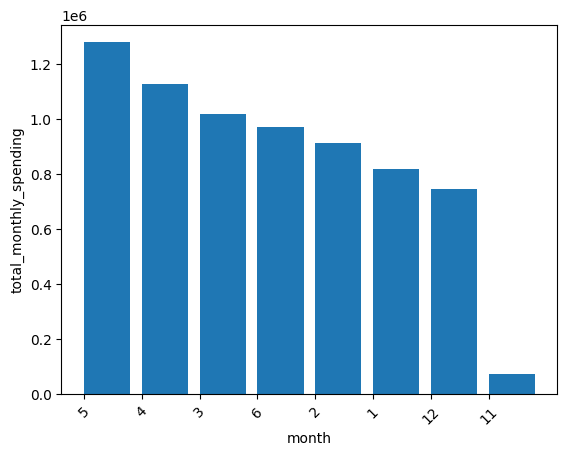

In [50]:
%matplotlib inline
_.bar(width = 0.8,align = 'edge')

### Analysis: The analysis of 2022 spending patterns among Washington Agencies on Amazon indicates a peak expenditure in May, totaling just over 1.27 million dollars. This peak is consistent with elevated sales in April and March. Contrary to the fiscal year starting in July, the high spending trend suggests agencies are allocating their budgets toward the calendar year-end, likely to prevent reductions and fully utilize available funds.

### Given these insights, targeting advertising efforts towards Washington Agencies during peak spending months (March, April, May) would be strategic for Amazon. Additionally, offering discounts or tailored business pricing plans during low-spending periods (July, September, November) can incentivize purchases during these typically quieter months.

### 1b ) Over each year, which Washington Agencies demonstrate the highest expenditures on Amazon orders? What are the trends for the top spending agencies (is spending increasing, decreasing, etc.)?

In [51]:
%%sql
SELECT 
    a.agency_id,
    EXTRACT(YEAR FROM CAST(od.day AS DATE)) AS year,
    SUM(amazon.item_net_total) AS total_annual_spending
FROM 
    amazon
JOIN 
    order_date od ON amazon.order_date_key = od.key
JOIN 
    agency a ON amazon.agency_key = a.key
GROUP BY 
    a.agency_id, EXTRACT(YEAR FROM CAST(od.day AS DATE))
ORDER BY 
    year, total_annual_spending DESC;

 * postgresql://student@/Final_Project
112 rows affected.


agency_id,year,total_annual_spending
CHILDREN YOUTH AND FAMILIES DEPT OF,2021.0,192314.84
SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),2021.0,171170.63
CORRECTIONS DEPARTMENT OF,2021.0,93643.41
TRANSPORTATION DEPARTMENT OF,2021.0,43528.33
FISH AND WILDLIFE DEPARTMENT OF,2021.0,39997.69
NATURAL RESOURCES DEPARTMENT OF,2021.0,36795.85
PARKS AND RECREATION COMMISSION WASHINGTON STATE,2021.0,31721.21
COMMERCE WA ST DEPT OF,2021.0,24160.82
LABOR AND INDUSTRIES WASHINGTON STATE,2021.0,21547.70
PUBLIC INSTRUCTION SUPERINTENDENT OF,2021.0,19269.24


<BarContainer object of 112 artists>

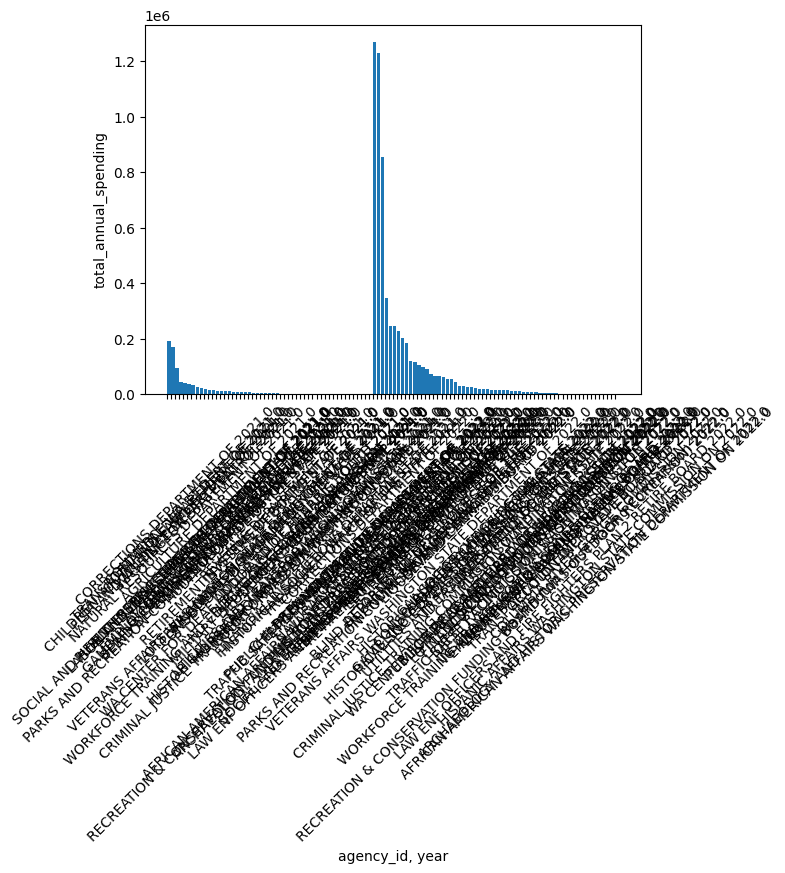

In [52]:
%matplotlib inline
_.bar(width = 0.8,align = 'edge')

### ALTERNATE 1b): During these high spend months, which Washington Agencies tend to spend the most on ordering from Amazon? 

### Business Reason: Identifying the top spending Washington Agencies during high expenditure months on Amazon provides critical insights for targeted marketing strategies. The consistent leadership of the Department of Social and Health Services and the Department of Children, Youth, and Families in March, April, and May signifies their substantial purchasing influence. To maximize sales, targeted advertising campaigns should prioritize these high-spending agencies with significant purchasing power. Simultaneously, offering discounts to agencies with lower spending tendencies can stimulate increased purchases during these peak months.

In [53]:
%%sql
SELECT 
    a.agency_id,
    SUM(o.item_net_total) AS total_spend_for_month
FROM 
    amazon AS o
JOIN 
    order_date AS od ON o.order_date_key = od.key
JOIN 
    agency AS a ON o.agency_key = a.key
WHERE 
    od.month_of_year = 5  
GROUP BY 
    a.agency_id
ORDER BY 
    total_spend_for_month DESC
LIMIT 5;

 * postgresql://student@/Final_Project
5 rows affected.


agency_id,total_spend_for_month
SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),293475.51
CHILDREN YOUTH AND FAMILIES DEPT OF,229636.88
CORRECTIONS DEPARTMENT OF,221836.55
FISH AND WILDLIFE DEPARTMENT OF,68954.19
LABOR AND INDUSTRIES WASHINGTON STATE,50612.71


In [54]:
%%sql
SELECT 
    a.agency_id,
    SUM(o.item_net_total) AS total_spend_for_month
FROM 
    amazon AS o
JOIN 
    order_date AS od ON o.order_date_key = od.key
JOIN 
    agency AS a ON o.agency_key = a.key
WHERE 
    od.month_of_year = 4  
GROUP BY 
    a.agency_id
ORDER BY 
    total_spend_for_month DESC
LIMIT 5;

 * postgresql://student@/Final_Project
5 rows affected.


agency_id,total_spend_for_month
SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),295998.70
CHILDREN YOUTH AND FAMILIES DEPT OF,207356.42
CORRECTIONS DEPARTMENT OF,147737.60
FISH AND WILDLIFE DEPARTMENT OF,71738.06
NATURAL RESOURCES DEPARTMENT OF,49330.08


In [55]:
%%sql
SELECT 
    a.agency_id,
    SUM(o.item_net_total) AS total_spend_for_month
FROM 
    amazon AS o
JOIN 
    order_date AS od ON o.order_date_key = od.key
JOIN 
    agency AS a ON o.agency_key = a.key
WHERE 
    od.month_of_year = 3 
GROUP BY 
    a.agency_id
ORDER BY 
    total_spend_for_month DESC
LIMIT 5;

 * postgresql://student@/Final_Project
5 rows affected.


agency_id,total_spend_for_month
CHILDREN YOUTH AND FAMILIES DEPT OF,233240.78
SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),197650.75
CORRECTIONS DEPARTMENT OF,133157.34
FISH AND WILDLIFE DEPARTMENT OF,55356.23
TRANSPORTATION DEPARTMENT OF,45939.96


### Analysis: Examining spending patterns across high expenditure months reveals consistent dominance by certain Washington Agencies. The Department of Social and Health Services and the Department of Children, Youth, and Families consistently outpace others in March, April, and May, surpassing the Department of Corrections. Leveraging this insight, targeted advertising initiatives should emphasize these top spenders, acknowledging their substantial purchasing capacity. Additionally, incentivizing lower-spending agencies with discounts during these high-spend periods could effectively prompt increased purchases, thereby optimizing Amazon's sales strategy across varying agency spending behaviors.

### 1c) How do the Net Purchase Totals from all Washington Agencies fluctuate yearly, and what factors contribute to these trends?

### Business Need: Understanding the annual fluctuations in Net Purchase Totals from Washington Agencies is critical for Amazon's strategic planning. By comprehending the factors driving these variations, Amazon can tailor its approach to capitalize on peak spending periods and mitigate downturns. Insights into the influences behind these fluctuations, such as fiscal year-end trends, external events like the COVID-19 pandemic, or shifts in agency priorities, empower Amazon to adapt its sales and marketing strategies accordingly. This knowledge enables Amazon to offer targeted solutions, anticipate spending behaviors, and optimize offerings to ensure consistent and maximized sales to Washington Agencies throughout the year.

In [56]:
%%sql
SELECT 
    EXTRACT(YEAR FROM CAST(od.day AS DATE)) AS year,
    SUM(amazon.item_net_total) AS total_net_purchase
FROM 
    amazon
JOIN 
    order_date od ON amazon.order_date_key = od.key
JOIN 
    agency a ON amazon.agency_key = a.key
GROUP BY 
    EXTRACT(YEAR FROM CAST(od.day AS DATE))
ORDER BY 
    year DESC;

 * postgresql://student@/Final_Project
2 rows affected.


year,total_net_purchase
2022.0,6119081.33
2021.0,820266.27


<BarContainer object of 2 artists>

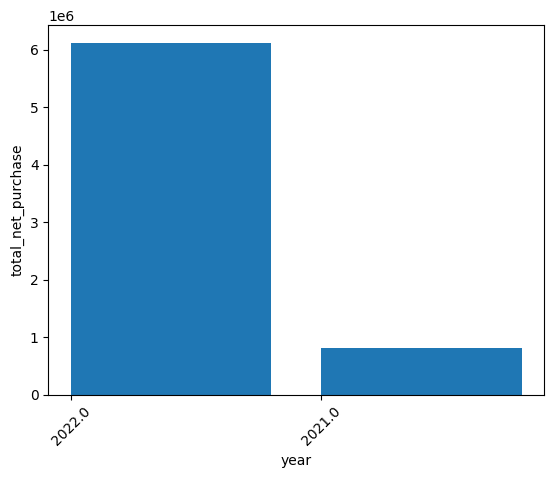

In [57]:
%matplotlib inline
_.bar(width = 0.8,align = 'edge')

### Analysis: In 2021, there was a significant drop in total net purchases, possibly influenced by the disruptive effects of COVID-19. This impact likely redirected spending priorities for government agencies like the Washington Agencies, emphasizing healthcare and disease management needs.

### However, the scenario shifted notably in 2022, with a substantial increase in total net purchases to $6,119,081.33, surpassing the preceding year's figures. This surge indicates a recovery or shift in spending patterns, highlighting the resilience or altered priorities within Washington Agencies post-pandemic. Understanding these fluctuations is crucial for Amazon to adapt strategies and sustain or augment sales to Washington Agencies.

### 2] What trends emerge in recurring orders, bulk orders, and customer attrition among the individual Washington Agencies that spend the most on Amazon purchases? 

### 2a) Which Washington Agencies have recorded the highest order volumes on Amazon during the Fiscal Year?

### Business Need: Identifying top buyers among Washington Agencies is crucial for Amazon's retention strategy, as these clients significantly contribute to overall profits. Maintaining consistent engagement with these agencies is essential to ensure continued patronage. Offering loyalty incentives and tailored advertising is pivotal to solidify relationships with these high-volume purchasers.

In [58]:
%%sql
SELECT 
    COUNT(*) AS order_count,
    a.agency_id
FROM 
    amazon AS o
JOIN 
    agency AS a ON o.agency_key = a.key
JOIN 
    order_date AS od ON o.order_date_key = od.key
WHERE 
    EXTRACT(YEAR FROM CAST(od.day AS DATE)) = 2022
GROUP BY 
    a.agency_id
ORDER BY 
    order_count DESC
LIMIT 10;

 * postgresql://student@/Final_Project
10 rows affected.


order_count,agency_id
13417,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)
12485,CHILDREN YOUTH AND FAMILIES DEPT OF
6642,CORRECTIONS DEPARTMENT OF
3840,FISH AND WILDLIFE DEPARTMENT OF
3281,PUBLIC INSTRUCTION SUPERINTENDENT OF
2744,PARKS AND RECREATION COMMISSION WASHINGTON STATE
2413,LABOR AND INDUSTRIES WASHINGTON STATE
2090,NATURAL RESOURCES DEPARTMENT OF
1505,TRANSPORTATION DEPARTMENT OF
1231,WASHINGTON STATE PATROL


<BarContainer object of 10 artists>

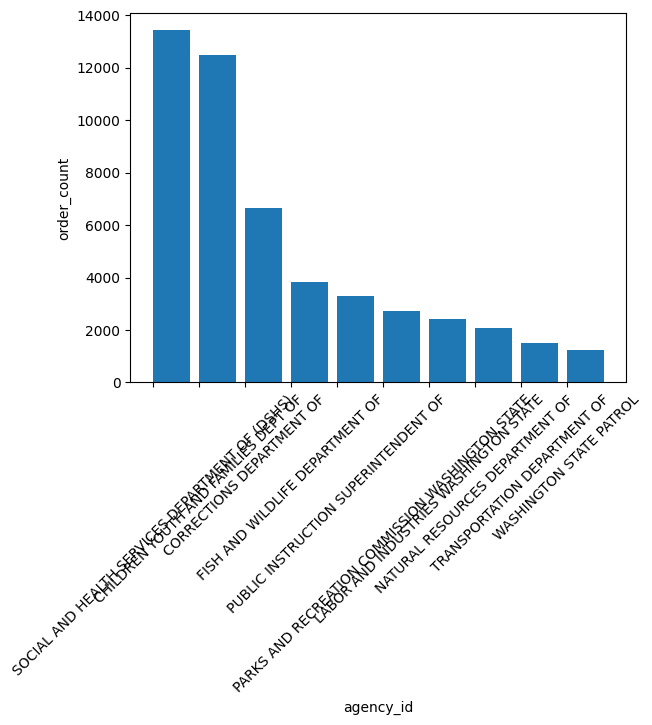

In [59]:
%matplotlib inline
_.bar(width = 0.8,align = 'edge')

### Analysis: The Department of Social and Health Services emerges as the top buyer among Washington Agencies based on order volume through Amazon. Sustaining advertising efforts directed at these agencies is imperative to maintain their loyalty and consistent orders. Additionally, implementing loyalty discounts specifically tailored for these top purchasing agencies can further cement their relationship with Amazon. However, delving deeper into purchase patterns reveals that while some agencies place fewer individual orders, they might compensate by making bulk purchases. Understanding this distinction aids in refining strategies to cater to both frequent and bulk-buying agencies, ensuring comprehensive retention efforts across different buying behaviors

### 2b) Among Washington Agencies, which ones are placing Bulk Orders (orders with item quantities exceeding 100) on Amazon? 

### Business Need: Identifying Washington Agencies that frequently place bulk orders on Amazon is essential for Amazon's tailored pricing strategies. Offering Quantity Pricing or Business Pricing to these agencies is crucial to encourage continued bulk purchasing behavior, ensuring sustained business relationships.

In [60]:
%%sql
SELECT 
    a.agency_id, 
    COUNT(*) as bulk_order_count
FROM 
    amazon AS o
JOIN 
    agency AS a ON o.agency_key = a.key
WHERE 
    o.item_quantity > 100
GROUP BY 
    a.agency_id
ORDER BY 
    bulk_order_count DESC;

 * postgresql://student@/Final_Project
8 rows affected.


agency_id,bulk_order_count
CORRECTIONS DEPARTMENT OF,11
ATTORNEY GENERAL OFFICE OF THE,2
ENTERPRISE SERVICES DEPARTMENT OF,1
LABOR AND INDUSTRIES WASHINGTON STATE,1
NATURAL RESOURCES DEPARTMENT OF,1
AGRICULTURE DEPARTMENT OF,1
SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),1
CHILDREN YOUTH AND FAMILIES DEPT OF,1


<BarContainer object of 8 artists>

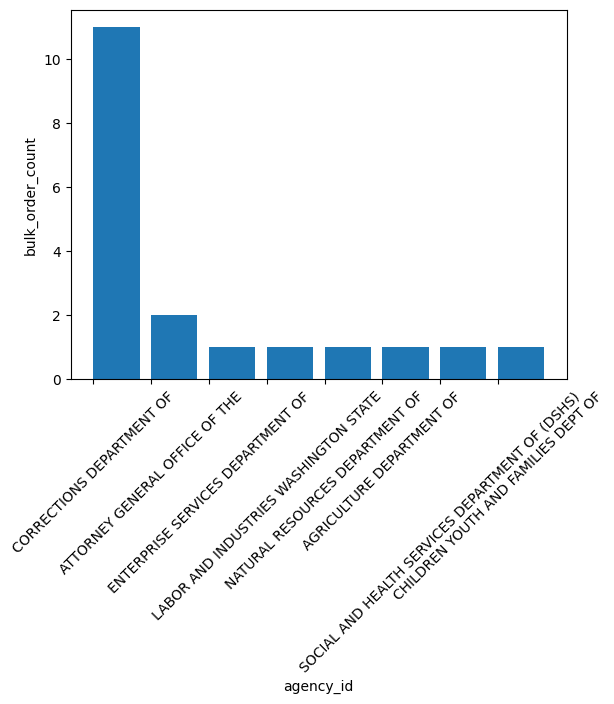

In [61]:
%matplotlib inline
_.bar(width = 0.8,align = 'edge')

### Analysis: Agencies like the Department of Corrections regularly placing bulk orders should be targeted for Quantity Pricing discounts to incentivize their ongoing bulk purchases. Additionally, proposing a subscription model for these high-volume orders could be advantageous. Shifting these agencies towards a subscription-based purchasing approach might reduce attrition rates associated with large one-time purchases, providing a more consistent revenue stream for Amazon while accommodating the agencies' budgeting preferences. This strategy aims to retain high-profit orders while mitigating potential spending attrition.

### 1c) Which Washington Agencies previously ordered from Amazon but have stopped?

### Business Need: Assessing the net gain or loss of Washington Agencies as Amazon customers is crucial to understand the overall impact on revenue. This evaluation aids Amazon in determining the value of re-engaging with agencies that stopped ordering, as well as in strategizing to retain newly acquired customers. Insights gained from this analysis help shape incentives and engagement tactics for customer retention and acquisition.

In [62]:
%%sql
SELECT 
    a.agency_id, 
    string_agg(CAST(year AS VARCHAR), ',') AS years,
    COUNT(year) AS count
FROM (
    SELECT 
        a.agency_id, 
        od.year,
        COUNT(*) AS order_count
    FROM 
        amazon AS o
    JOIN 
        agency AS a ON o.agency_key = a.key
    JOIN 
        order_date AS od ON o.order_date_key = od.key
    GROUP BY 
        a.agency_id, od.year
) AS A
GROUP BY 
    a.agency_id
ORDER BY 
    count
LIMIT 11;

 * postgresql://student@/Final_Project
11 rows affected.


agency_id,years,count
JUDICIAL CONDUCT WA ST COMM ON,2022,1
Washington Horse Racing Commission,2022,1
Environmental & Land Use Hearings Office,2022,1
INSURANCE COMMISSIONER OFFICE OF THE,2022,1
LIEUTENANT GOVERNOR OFFICE OF THE,2022,1
TRANSPORTATION IMPROVEMENT BOARD,2022,1
ACCOUNTANCY STATE BOARD OF,2022,1
COLUMBIA RIVER GORGE COMMISSION,2022,1
HISPANIC AFFAIRS WASHINGTON STATE COMMISSION ON,2022,1
HUMAN RIGHTS COMMISSION,2022,1


<BarContainer object of 11 artists>

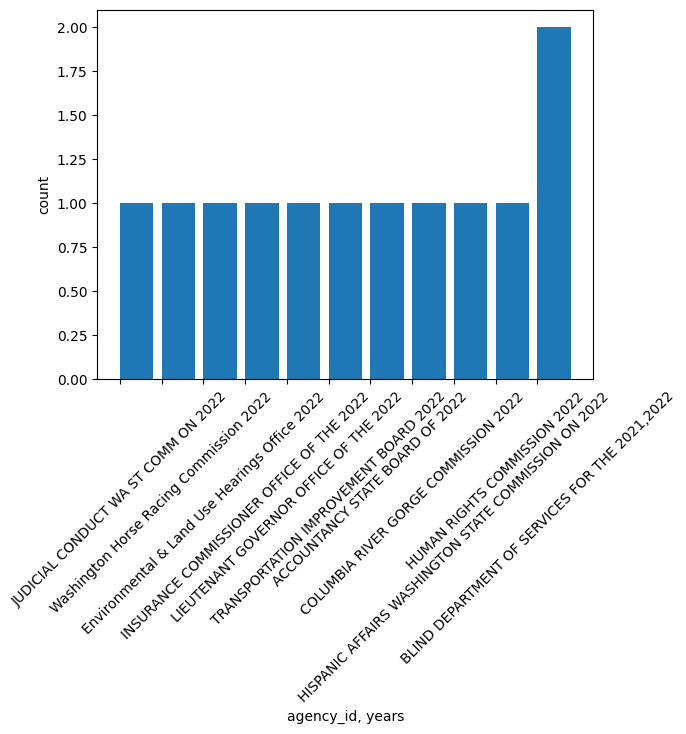

In [63]:
%matplotlib inline
_.bar(width = 0.8,align = 'edge')

### Analysis: Several agencies, including the Commission on Judicial Conduct, Transportation Improvement Board, State Board of Accountancy, Human Rights Commission, and others, did not engage with Amazon in 2021 but initiated orders in Fiscal Year 2022. This surge indicates a potential increase in Amazon's customer base during that period, possibly attributed to post-COVID spending trends. Calculating the spending from these agencies provides a clear understanding of the net gain or loss for Amazon. This insight is pivotal in assessing the impact of customer acquisition and attrition, guiding strategies to either regain lost customers or further incentivize and retain the newly acquired ones.